Feature Importance

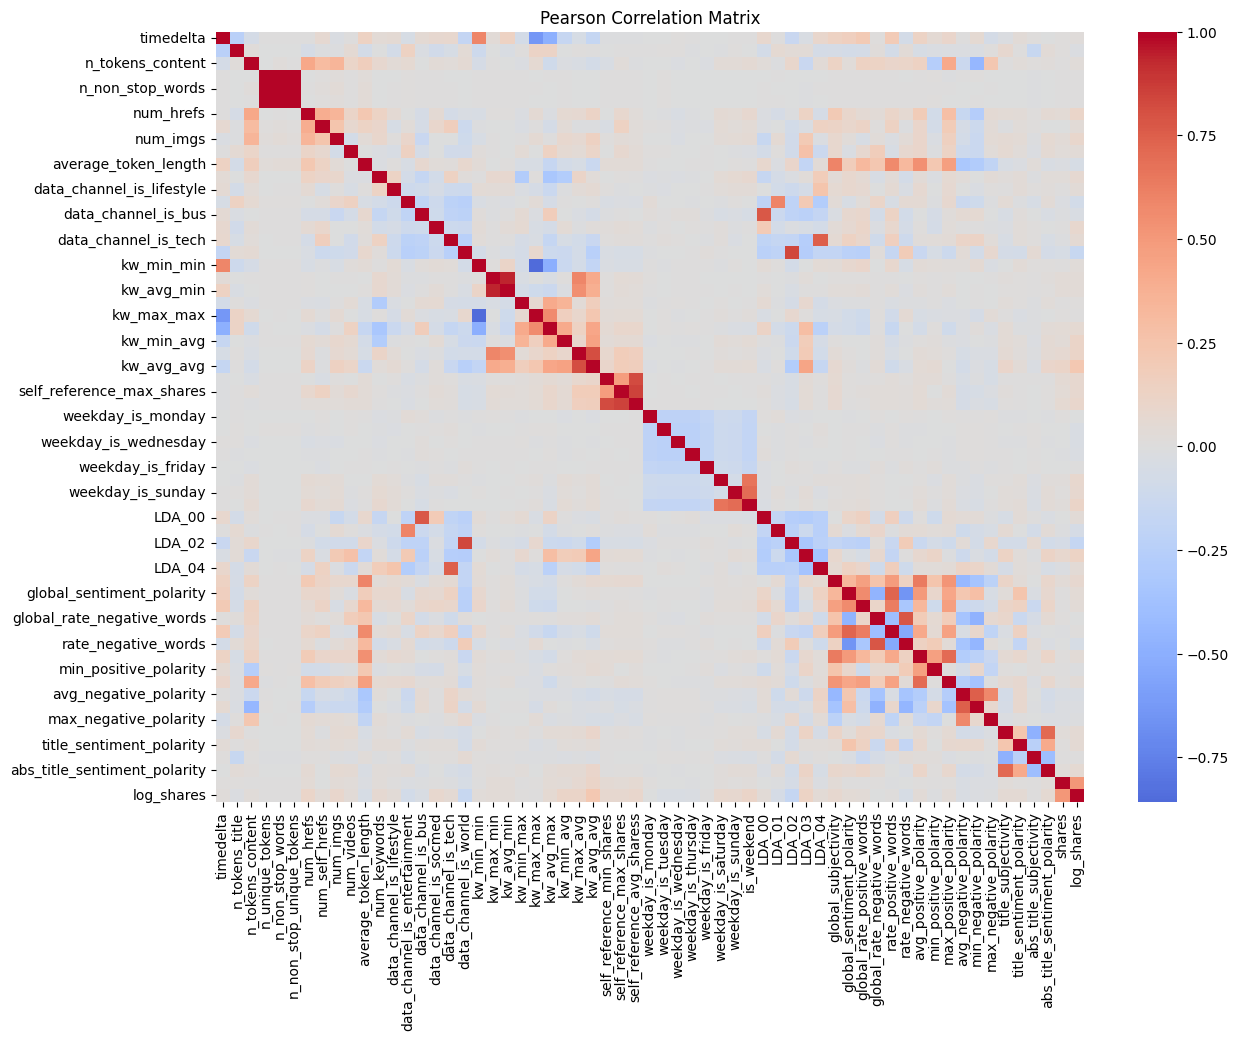

Top Spearman Correlations with log_shares:
shares                        1.000000
log_shares                    1.000000
kw_avg_avg                    0.255622
kw_max_avg                    0.223291
self_reference_avg_sharess    0.192174
self_reference_min_shares     0.181517
self_reference_max_shares     0.168725
is_weekend                    0.151718
data_channel_is_socmed        0.113572
global_subjectivity           0.113548
Name: log_shares, dtype: float64


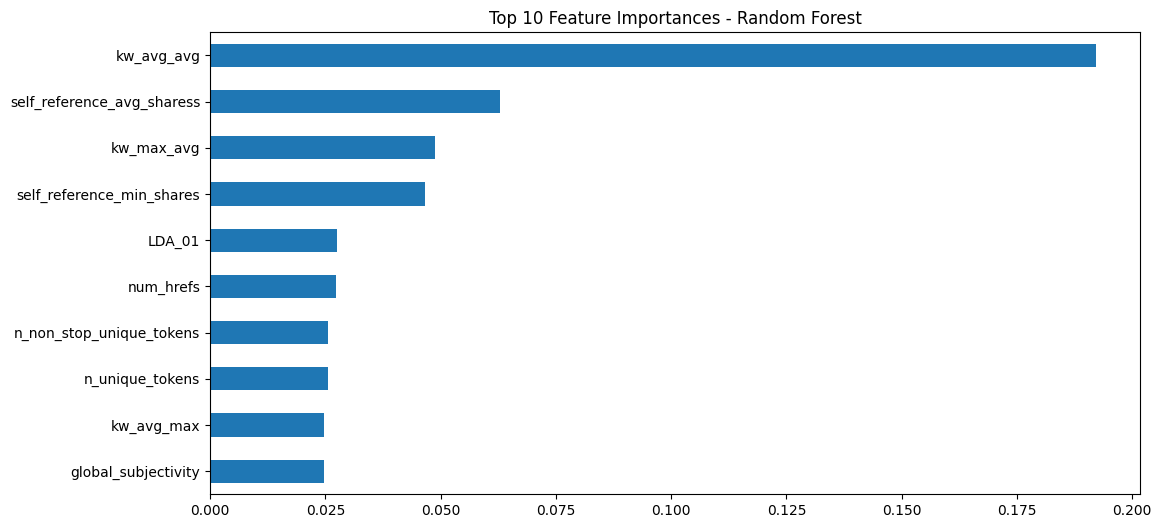

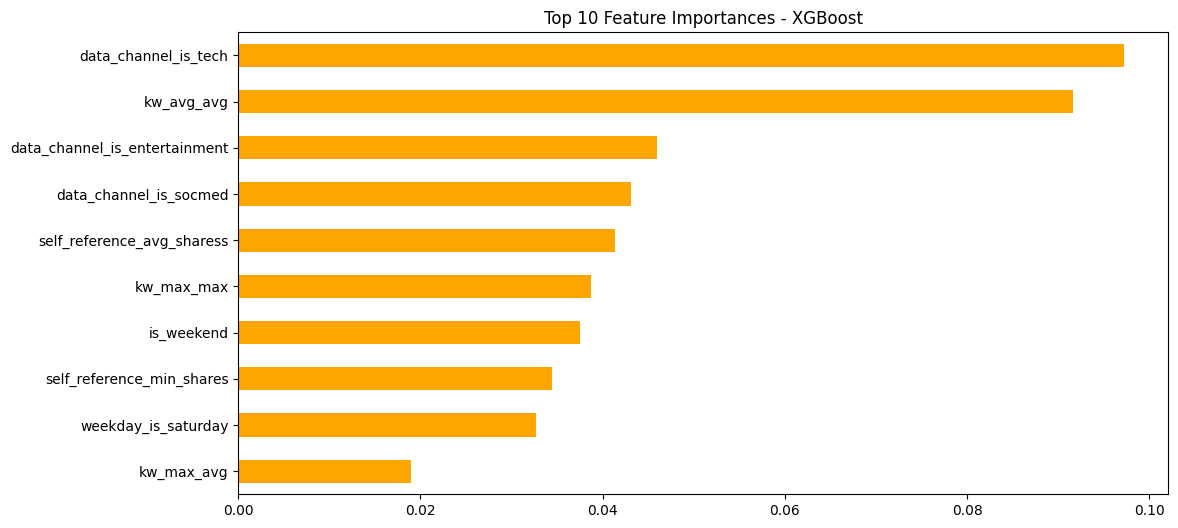

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb

df = pd.read_csv("../data/processed/cleaned_data.csv")

# Prepare data
X = df.drop(columns=["url", "timedelta", "shares", "log_shares"])
y = df["log_shares"]

# ---------------------- 1. Correlation Matrix ----------------------
# Pearson Correlation
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

# Spearman Correlation with log_shares
spearman_corr = df.corr(method="spearman", numeric_only=True)["log_shares"].sort_values(ascending=False)
print("Top Spearman Correlations with log_shares:")
print(spearman_corr.head(10))

# ---------------------- 2. Feature Importance ----------------------
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=50, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# ---------------------- Plot Feature Importances ----------------------
plt.figure(figsize=(12, 6))
rf_importance.head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
xgb_importance.head(10).plot(kind="barh", color='orange')
plt.title("Top 10 Feature Importances - XGBoost")
plt.gca().invert_yaxis()
plt.show()
